In [1]:
from PIL import Image, ImageDraw, ImageOps
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import threading
import math
import os

point_size = 1

df1 = pd.read_csv('../Bildgenerierung/horizontale.csv')
df2 = pd.read_csv('../Bildgenerierung/strichmann.csv')
df3 = pd.read_csv('../Bildgenerierung/ostfalia.csv')
df4 = pd.read_csv('../Bildgenerierung/vertikale.csv')
df5 = pd.read_csv('../Bildgenerierung/tshirt.csv')
df6 = pd.read_csv('../Bildgenerierung/schlange.csv')
df7 = pd.read_csv('../Bildgenerierung/haus_vom_nikolaus.csv')
dfs = [df1, df2, df3, df4, df5, df6, df7]

image1 = Image.open('../Bildgenerierung/horizontale.png')
image2 = Image.open('../Bildgenerierung/strichmann.png')
image3 = Image.open('../Bildgenerierung/ostfalia.png')
image4 = Image.open('../Bildgenerierung/vertikale.png')
image5 = Image.open('../Bildgenerierung/tshirt.png')
image6 = Image.open('../Bildgenerierung/schlange.png')
image7 = Image.open('../Bildgenerierung/haus_vom_nikolaus.png')
images = [image1, image2, image3, image4, image5, image6, image7]

def distancePointToCircle(P, A, B):
    M = [(B[0] + A[0]) * 0.5, (B[1] + A[1]) * 0.5]
    MP = [M[0] - P[0], M[1] - P[1]]
    length_MP = math.sqrt(MP[0] ** 2 + MP[1] ** 2)

    outer_radius = abs(A[0] - M[0])
    radius = outer_radius - 12.5
    return abs(length_MP - radius)

def distancePointToLineBetweenPoints(P, A, B):
    AB = [B[0] - A[0], B[1] - A[1]]
    AP = [P[0] - A[0], P[1] - A[1]]

    length_AB = math.sqrt(AB[0] ** 2 + AB[1] ** 2)
    AB_unit = [AB[0] / length_AB, AB[1] / length_AB]

    dot_product = AP[0] * AB_unit[0] + AP[1] * AB_unit[1]
    projection = [AB_unit[0] * dot_product, AB_unit[1] * dot_product]

    I = [A[0] + projection[0], A[1] + projection[1]]
    AI = [A[0] - I[0], A[1] - I[1]]
    BI = [B[0] - I[0], B[1] - I[1]]
    length_AI = math.sqrt(AI[0] ** 2 + AI[1] ** 2)
    length_BI = math.sqrt(BI[0] ** 2 + BI[1] ** 2)
    if length_AB < length_AI + length_BI:
        BP = [P[0] - B[0], P[1] - B[1]]
        length_AP = math.sqrt(AP[0] ** 2 + AP[1] ** 2)
        length_BP = math.sqrt(BP[0] ** 2 + BP[1] ** 2)
        #print('aussen ' + str(min(length_AP, length_BP)) + str(P) + str(A) + str(B))
        return min(length_AP, length_BP)
    PI = [P[0] - I[0], P[1] - I[1]]
    return math.sqrt(PI[0] ** 2 + PI[1] ** 2)
    
def calculateDistance(index, x, y):
    df = dfs[index]
    dist = 1000000
    distance = 0
    for index, row in df.iterrows():
        match row['type']:
            case 'l':
                distance = distancePointToLineBetweenPoints((x,y), (row['x1'], row['y1']), (row['x2'], row['y2']))
            case 'c':
                distance = distancePointToCircle((x,y), (row['x1'], row['y1']), (row['x2'], row['y2']))
        if dist > distance:
            dist = distance
    if dist == 1000000:
        print(str(index) + '  ' + str(x) + '  ' + str(y))
    return dist
  
#def test():
#    A = (500, 650)
#    B = (500, 300)
#    P = (560, 299)
#    print(distancePointToLineBetweenPoints(P, A, B))

#test()

def createImages(type):
    allDistances = []

    draw = []
    for image in images:
        draw.append(ImageDraw.Draw(image))

    for n in range(1, 27):
    #for n in range(10,11):
        print('person nr. ' + str(n))
        filepath = '../Versuchsdaten_vorverarbeitet/' + str(n) + '/' + type + '.csv'
        if not os.path.isfile(filepath):
            print('No data to read ' + type + " nr. " + str(n))
            continue
        df = pd.read_csv(filepath)
        pictures = df.groupby('sublevel')
        imageIndex = 0

        for group_value, group_data in pictures:
            pic_dataframes = []
            pic_dataframes.append(group_data.copy())
            pic_df = pd.concat(pic_dataframes, ignore_index=True)

            for index, row in pic_df.iterrows():
                x = float(row['x'])
                y = float(row['y'])
                #draw[imageIndex].point((x, y), fill=(100, 100, 100))
                distance = calculateDistance(imageIndex, x, y)
                allDistances.append(distance)
                red = int(distance * 10 - 45)
                green = int(255 - distance * 10)
                blue = 0
                if red < 0:
                    red = 0
                if green < 0:
                    green = 0
                draw[imageIndex].rectangle([x - point_size, y - point_size, x + point_size, y + point_size], fill=(red,green,blue))
            imageIndex += 1
            #For visualization of difference between saving the pictures
            #images[2].save('../Visualisierungen/image' + str(n) + '_' + str(imageIndex) + '.png')
    imageIndex = 0
    path_out = '../Visualisierungen/' + type
    if not os.path.exists(path_out):
        os.makedirs(path_out)
    for image in images:
        image.save(path_out + '/image' + str(imageIndex) + '.png')
        imageIndex += 1
    return allDistances

realDistances = createImages('real')
virtuellDistances = createImages('virtuell')
hapticDistances = createImages('haptisch')

print('Done')

person nr. 1
person nr. 2
person nr. 3
person nr. 4
person nr. 5
person nr. 6
person nr. 7
person nr. 8
person nr. 9
person nr. 10
person nr. 11
person nr. 12
person nr. 13
person nr. 14
person nr. 15
person nr. 16
person nr. 17
person nr. 18
person nr. 19
person nr. 20
person nr. 21
person nr. 22
person nr. 23
person nr. 24
person nr. 25
person nr. 26
person nr. 1
person nr. 2
person nr. 3
person nr. 4
person nr. 5
person nr. 6
person nr. 7
person nr. 8
person nr. 9
person nr. 10
person nr. 11
person nr. 12
person nr. 13
person nr. 14
person nr. 15
person nr. 16
person nr. 17
No data to read virtuell nr. 17
person nr. 18
No data to read virtuell nr. 18
person nr. 19
person nr. 20
person nr. 21
person nr. 22
person nr. 23
person nr. 24
person nr. 25
person nr. 26
person nr. 1
person nr. 2
person nr. 3
person nr. 4
person nr. 5
person nr. 6
person nr. 7
person nr. 8
person nr. 9
person nr. 10
person nr. 11
person nr. 12
person nr. 13
person nr. 14
person nr. 15
person nr. 16
person nr. 

In [2]:
def cropimage(image, type):    
    width, height = image.size
    left = 0
    upper = 0
    right = width
    lower = height

    while all(image.getpixel((x, upper)) == (255,255,255) for x in range(width)):
        upper += 1
    
    while all(image.getpixel((x, lower - 1)) == (255,255,255) for x in range(width)):
        lower -= 1
    
    while all(image.getpixel((left, y)) == (255,255,255) for y in range(height)):
        left += 1
    
    while all(image.getpixel((right - 1, y)) == (255,255,255) for y in range(height)):
        right -= 1

    iii = image.crop((left, upper, right, lower))
    iii.save('../Visualisierungen/' + type + '/image-merged-cropped-' + type + '.png')

def mergeimages(type):
    for n in range(0,6):
        p = '../Visualisierungen/' + type + '/image' + str(n) + '.png'
        images[n] = Image.open(p)
    new_image = Image.new('RGB',(2*1368, 3*912), (0,0,0))
    new_image.paste(images[0],(0,0))
    new_image.paste(images[1],(1368,0))
    new_image.paste(images[2],(0,912))
    new_image.paste(images[3],(1368,912))
    new_image.paste(images[4],(0,1824))
    new_image.paste(images[5],(1368,1824))
    new_image.save('../Visualisierungen/' + type + '/image-merged-' + type + '.png')
    cropimage(new_image, type)
    
def mergeimagesvertical(type):
    for n in range(0,7):
        p = '../Visualisierungen/' + type + '/image' + str(n) + '.png'
        images[n] = Image.open(p)
    new_image = Image.new('RGB',(1368, 7*912), (0,0,0))
    new_image.paste(images[0],(0,0))
    new_image.paste(images[1],(0,912))
    new_image.paste(images[2],(0,912*2))
    new_image.paste(images[3],(0,912*3))
    new_image.paste(images[4],(0,912*4))
    new_image.paste(images[5],(0,912*5))
    new_image.paste(images[6],(0,912*6))
    new_image.save('../Visualisierungen/' + type + '/image-merged-vert-' + type + '.png')
    
mergeimages('real')
mergeimages('virtuell')
mergeimages('haptisch')
mergeimagesvertical('real')
mergeimagesvertical('virtuell')
mergeimagesvertical('haptisch')

print('Done')

Done


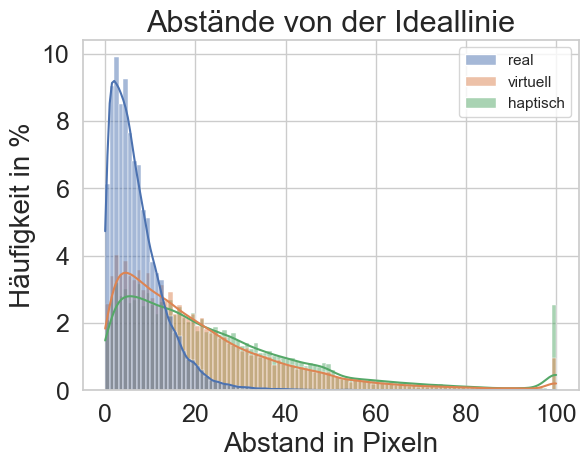

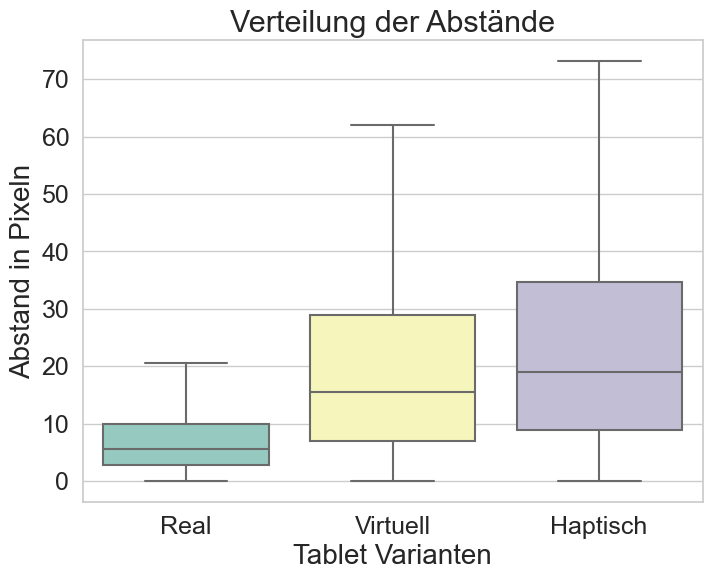

Done


In [23]:
fontsizeHeader = 22
fontsizeLabel = 20
fontsize = 18

#def visualize1(distances, type):
#    print('Amount of Pixels: ' + str(len(distances)))
    #filtered_list = allDistances
#    filtered_list = [x if x <= 100 else 100 for x in distances]

#    print('Amount of Pixels filtered: ' + str(len(filtered_list)))
#    sns.set(style="whitegrid")
#    sns.histplot(filtered_list, kde=True, color='blue', binwidth=1, stat='percent')
#    plt.title("Verteilung der Daten")
#    plt.xlabel("Abstand in Pixeln von der Ideallinie")
#    plt.ylabel("Häufigkeit in %")
#
#    plt.savefig('../Visualisierungen/' + type + '/distribution-pixeldistance-' + type + '.png', dpi=300)
#    plt.show()
#    plt.close()

def visualizeVerteilung(data):
    sns.set(style="whitegrid")
    #sns.histplot(data, kde=True, palette="Set3", binwidth=1, stat='percent', common_norm=False)
    sns.histplot(data, kde=True, color='blue', binwidth=1, stat='percent', common_norm=False)
    plt.title("Abstände von der Ideallinie", fontsize=fontsizeHeader)
    plt.xlabel("Abstand in Pixeln", fontsize=fontsizeLabel)
    plt.ylabel("Häufigkeit in %", fontsize=fontsizeLabel)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.savefig('../Visualisierungen/distribution-pixeldistance-combinded.png', dpi=300)
    #plt.savefig('../Visualisierungen/distribution-pixeldistance-combined.png', dpi=300)
    plt.show()
    plt.close()
    
def visualizeBoxplot(data):
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))  # Größe des Plots festlegen

    sns.boxplot(data=data, palette="Set3", showfliers = False)  # "Set3" ist ein Farbschema
    plt.xticks([0, 1, 2], ['Real', 'Virtuell', 'Haptisch'])  # Beschriftungen für die Boxplots
    plt.xlabel("Tablet Varianten",fontsize=fontsizeLabel)
    plt.ylabel("Abstand in Pixeln",fontsize=fontsizeLabel)
    plt.title("Verteilung der Abstände",fontsize=fontsizeHeader)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.savefig('../Visualisierungen/boxplot-abstaende.png', dpi=300)
    plt.show()

#visualize1(realDistances, 'real')
#visualize1(virtuellDistances, 'virtuell')
#visualize1(hapticDistances, 'haptisch')

max_len = max(len(realDistances), len(virtuellDistances), len(hapticDistances))

realDistancesCapped100 = [x if x <= 100 else 100 for x in realDistances]
virtuellDistancesCapped100 = [x if x <= 100 else 100 for x in virtuellDistances]
hapticDistancesCapped100 = [x if x <= 100 else 100 for x in hapticDistances]
#dataCapped100 = [realDistancesCapped100, virtuellDistancesCapped100, hapticDistancesCapped100]

realDistancesCapped100.extend([np.nan] * (max_len - len(realDistancesCapped100)))
virtuellDistancesCapped100.extend([np.nan] * (max_len - len(virtuellDistancesCapped100)))
hapticDistancesCapped100.extend([np.nan] * (max_len - len(hapticDistancesCapped100)))

dfCapped100 = pd.DataFrame({"real":realDistancesCapped100,
                       "virtuell":virtuellDistancesCapped100,
                       "haptisch":hapticDistancesCapped100})
visualizeVerteilung(dfCapped100)

realDistancesFilledNaN = realDistances.copy()
virtuellDistancesFilledNaN = virtuellDistances.copy()
hapticDistancesFilledNaN = hapticDistances.copy()
realDistancesFilledNaN.extend([np.nan] * (max_len - len(realDistancesFilledNaN)))
virtuellDistancesFilledNaN.extend([np.nan] * (max_len - len(virtuellDistancesFilledNaN)))
hapticDistancesFilledNaN.extend([np.nan] * (max_len - len(hapticDistancesFilledNaN)))

dfTotal = pd.DataFrame({"real":realDistancesFilledNaN,
                       "virtuell":virtuellDistancesFilledNaN,
                       "haptisch":hapticDistancesFilledNaN})
visualizeBoxplot(dfTotal)

print('Done')


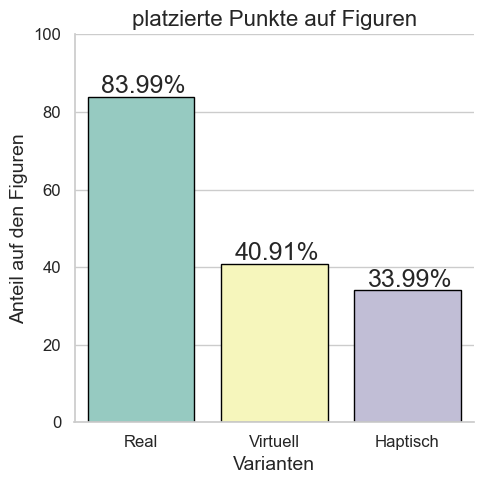

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns

fontsizeHeader = 22
fontsizeLabel = 20
fontsize = 18

realDistancesTF = [True if x <= 12 else False for x in realDistances]
virtDistancesTF = [True if x <= 12 else False for x in virtuellDistances]
haptDistancesTF = [True if x <= 12 else False for x in hapticDistances]
percentage_distances_real = pd.DataFrame({"real":realDistancesTF})
percentage_distances_virt = pd.DataFrame({"virtuell":virtDistancesTF})
percentage_distances_hapt = pd.DataFrame({"haptisch":haptDistancesTF})
percentage_real = percentage_distances_real.mean() * 100
percentage_virt = percentage_distances_virt.mean() * 100
percentage_hapt = percentage_distances_hapt.mean() * 100

treffer_percentages = pd.DataFrame({"Real":percentage_real, "Virtuell":percentage_virt, "Haptisch":percentage_hapt})

stacked_df = treffer_percentages.stack().reset_index()
stacked_df.columns = ["index", "Tablet Variante", "Anteil Punkte auf vorgegebenen Figuren"]

#print(stacked_df)

g = sns.catplot(x='Tablet Variante',palette="Set3",y='Anteil Punkte auf vorgegebenen Figuren',kind='bar',edgecolor="black",data=stacked_df, order=['Real', 'Virtuell' , 'Haptisch'])
g.ax.set_ylim(0,100)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Varianten",fontsize=14)
plt.ylabel("Anteil auf den Figuren",fontsize=14)
plt.title("platzierte Punkte auf Figuren",fontsize=16)
#plt.gcf().subplots_adjust(bottom=0.15)
plt.tight_layout()

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + 0.1
    txt_y = p.get_height() + 1
    g.ax.text(txt_x,txt_y,txt,fontsize=fontsize)
plt.savefig('../Visualisierungen/points_on_lines.png', dpi=300)

person nr. 11
person nr. 12
person nr. 13
person nr. 14
person nr. 15
person nr. 16
person nr. 17
No data to read virtuell nr. 17
person nr. 18
No data to read virtuell nr. 18
person nr. 19
person nr. 20
person nr. 21
person nr. 22
person nr. 23
person nr. 24
person nr. 25
person nr. 26
person nr. 11
person nr. 12
person nr. 13
person nr. 14
person nr. 15
person nr. 16
person nr. 17
person nr. 18
person nr. 19
person nr. 20
person nr. 21
person nr. 22
person nr. 23
person nr. 24
person nr. 25
person nr. 26
No data to read haptisch nr. 26


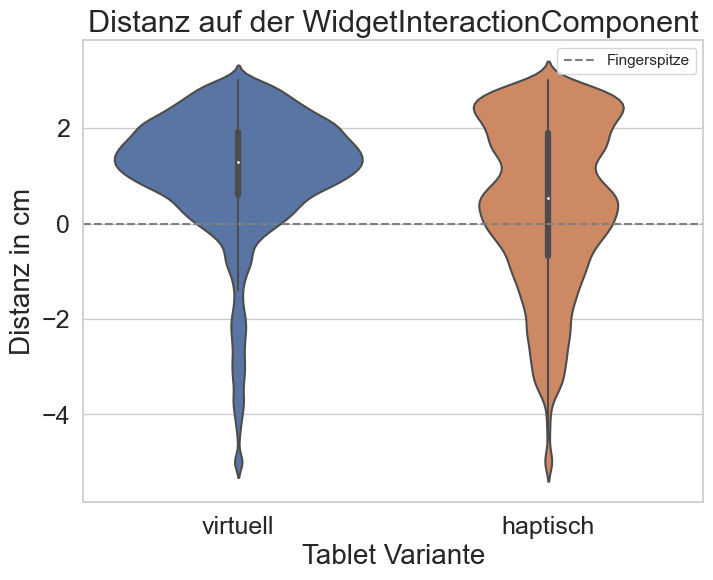

In [18]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fontsizeHeader = 22
fontsizeLabel = 20
fontsize = 18

def depthOfCollision(type):
    
    df_total = 0
    first = True
    
    for n in range(11, 27):
        print('person nr. ' + str(n))
        filepath = '../Versuchsdaten_vorverarbeitet/' + str(n) + '/' + type + '.csv'
        if not os.path.isfile(filepath):
            print('No data to read ' + type + " nr. " + str(n))
            continue
        df = pd.read_csv(filepath)
        df['distance'] = df['distance'].subtract(5)
        if first:
            df_total = df

            first = False
        else:
            df_total = pd.concat([df_total, df]).reset_index(drop=True)
    return df_total

data_virt = depthOfCollision('virtuell')
data_hapt = depthOfCollision('haptisch')

data_hapt['Dataset'] = 'haptisch'
data_virt['Dataset'] = 'virtuell'

# Zusammenführen der DataFrames
combined_data = pd.concat([data_virt, data_hapt])

# Boxplot erstellen
plt.figure(figsize=(8, 6))
sns.violinplot(x='Dataset', y='distance', data=combined_data)

plt.axhline(y=0, color='gray', linestyle='--', label='Fingerspitze')
# Plot anzeigen
plt.xlabel('Tablet Variante',fontsize=fontsizeLabel)
plt.ylabel('Distanz in cm',fontsize=fontsizeLabel)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.title('Distanz auf der WidgetInteractionComponent',fontsize=fontsizeHeader)
plt.legend()
plt.savefig('../Visualisierungen/distance_interaction.png', dpi=300)
plt.show()
